In [1]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 통신사 데이터 불러오기
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플\파이널프로젝트 데이터/202211_202301_통신정보(쇼핑전처리).xlsx'
df = pd.read_excel(excelFile, usecols = 'A:L')
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%"
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00


In [3]:
# 자치구별 총인구수 합계
result1 = df[['자치구', '총인구수']].groupby(['자치구'], as_index = False).sum().sort_values(by = '총인구수', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,총인구수
0,송파구,528482.22
1,강서구,467858.93
2,노원구,448140.80
3,관악구,447628.06
4,강남구,438342.97
5,은평구,391502.98
6,성북구,373924.02
7,구로구,370283.54
8,양천구,368116.85
9,강동구,365204.32


## 지도 시각화

* 참고: https://wscode.tistory.com/57

In [4]:
# Geopandas 설치
# !pip install geopandas

In [5]:
import geopandas as gpd

In [6]:
# shp파일 확인
myMap = 'C:/Users/chunc/Desktop/데이터 샘플/파이널프로젝트 데이터/SIG_20221119/sig.shp'
df1 = gpd.read_file(myMap, encoding='euc-kr')
df1.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


<Axes: >

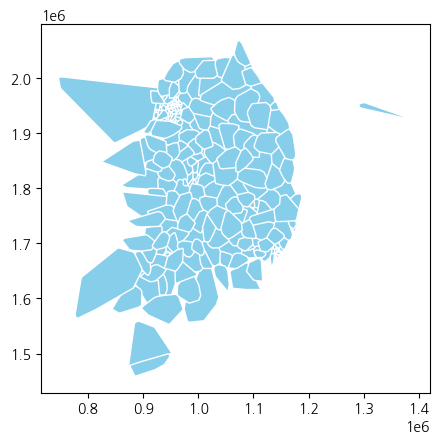

In [7]:
# 지도 출력
df1.convex_hull.plot(color='skyblue', edgecolor="w")

In [8]:
# 서울만 표시하기
# SIG_CD 데이터 형식을 정수 integer로 변경
df1.info()
type_df1 = df1.astype({ 'SIG_CD' : 'int' })
type_df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SIG_CD      250 non-null    object  
 1   SIG_ENG_NM  250 non-null    object  
 2   SIG_KOR_NM  250 non-null    object  
 3   geometry    250 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 7.9+ KB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SIG_CD      250 non-null    int32   
 1   SIG_ENG_NM  250 non-null    object  
 2   SIG_KOR_NM  250 non-null    object  
 3   geometry    250 non-null    geometry
dtypes: geometry(1), int32(1), object(2)
memory usage: 7.0+ KB


In [9]:
seoul = type_df1[type_df1['SIG_CD']<20000]

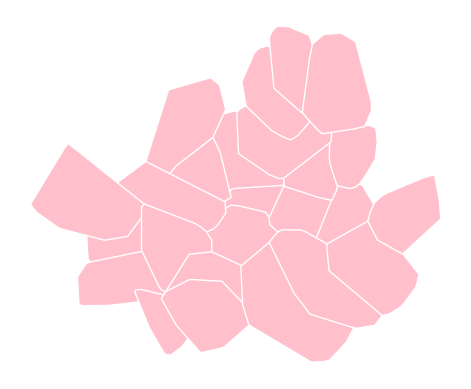

In [10]:
ax = seoul.convex_hull.plot(color='pink', edgecolor="w")
# 축제거
ax.set_axis_off()
plt.show()

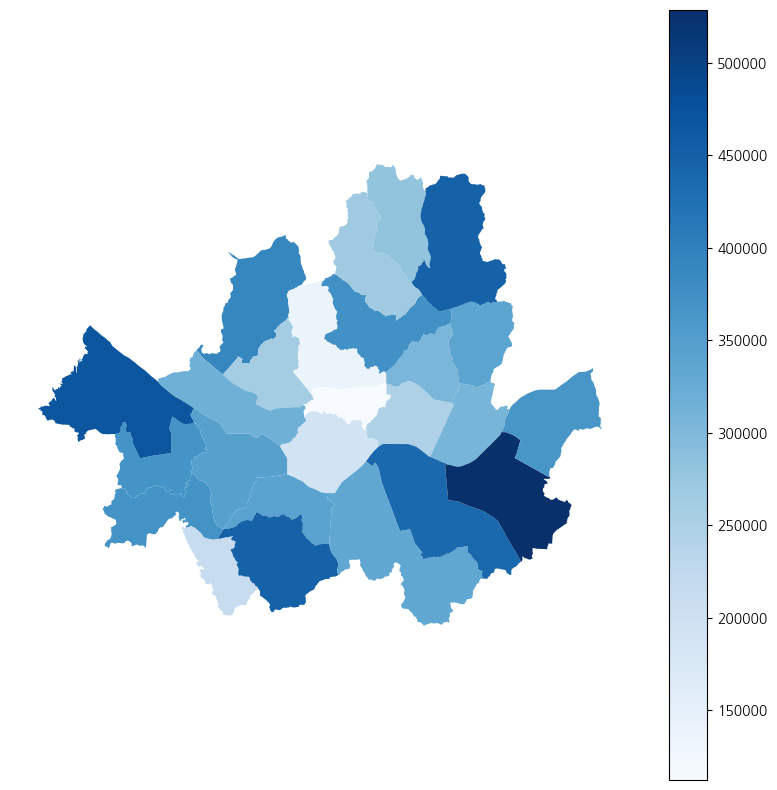

In [11]:
# 자치구 이름 기준으로 데이터 병합
merged_data = seoul.merge(result1, left_on='SIG_KOR_NM', right_on='자치구')

# 분포 시각화
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data.plot(column='총인구수', cmap='Blues', linewidth=0.8, ax=ax, legend=True)

plt.show()

In [12]:
# 자치구별 1인 가구수 합계
result2 = df[['자치구', '1인가구수']].groupby(['자치구'], as_index = False).sum().sort_values(by = '1인가구수', ascending = False).reset_index(drop = True)
result2.head(10)

,자치구,1인가구수
0,관악구,140447.33
1,강서구,83887.16
2,강남구,83017.11
3,송파구,79947.04
4,영등포구,73849.38
5,광진구,72089.47
6,마포구,70558.84
7,동작구,69772.56
8,동대문구,68411.59
9,성북구,65850.52


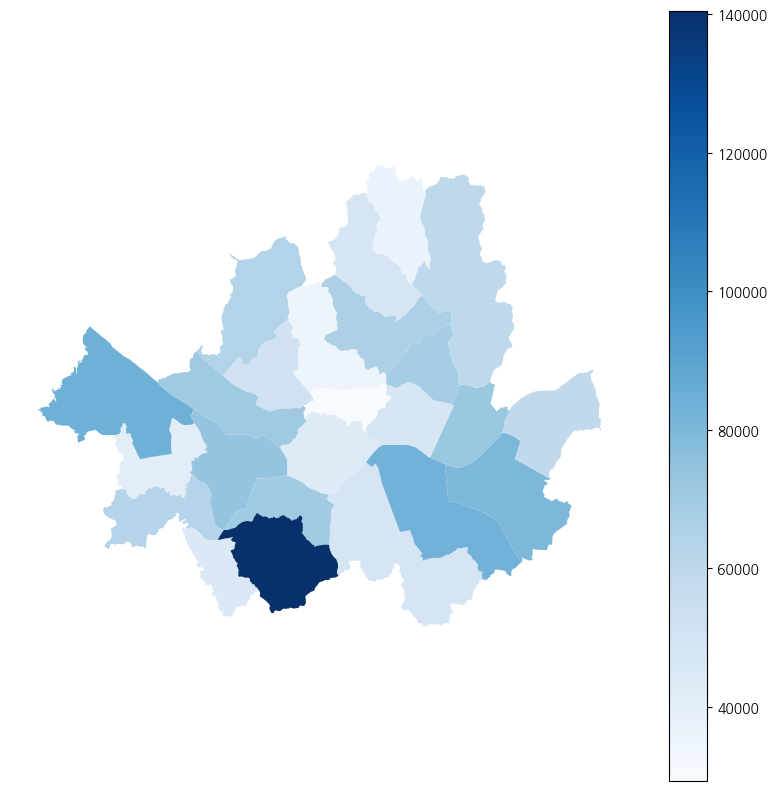

In [13]:
# 자치구 이름 기준으로 데이터 병합
merged_data2 = seoul.merge(result2, left_on='SIG_KOR_NM', right_on='자치구')

# 분포 시각화
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()

# 자치구별 1인가구수 합계에 따라 색상 매핑
merged_data2.plot(column='1인가구수', cmap='Blues', linewidth=0.8, ax=ax, legend=True)

plt.show()